### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

## Import Dataset

In [1]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

Current directory: /content
Files in directory: ['.config', 'sample_data']


In [ ]:
dataset = pd.read_csv('student_scores.csv')
df = dataset.copy()
dataset.head()

In [4]:
# show 5 rows data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [5]:
# get information data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# get describes basic stat dataset used
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


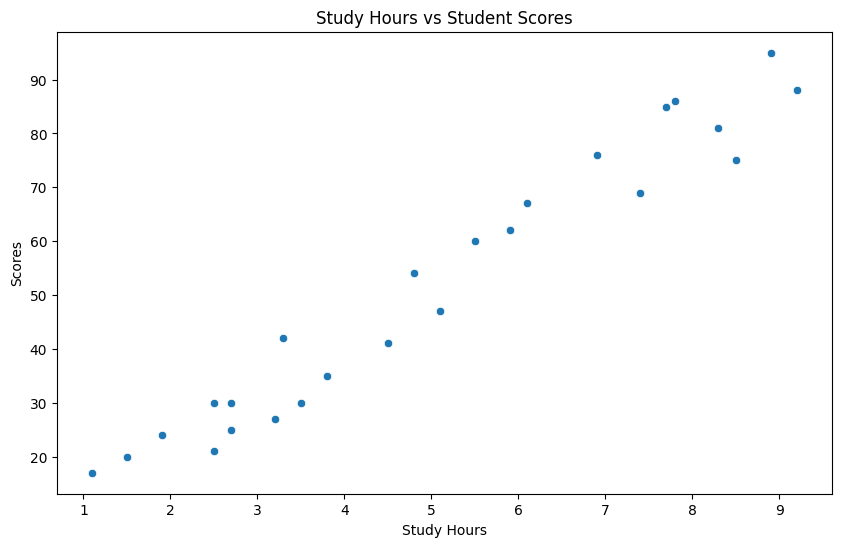

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x='Hours', y='Scores')
plt.title('Study Hours vs Student Scores')
plt.ylabel('Scores')
plt.xlabel('Study Hours')
plt.show()

Feature engineering :
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis

## Investigate of Feature Engineering

In [9]:
# check data to makesure there's no duplicate data
print('data before checking duplicate')
print(df.shape)

data before checking duplicate
(25, 2)


In [13]:
duplicate_rows_before = df[df.duplicated()]
print('data duplicate before: ', len(duplicate_rows_before))

data duplicate before:  0


In [14]:
# delete duplicate data
df = df.drop_duplicates()
print('data after checking duplicate')
print(df.shape)

data after checking duplicate
(25, 2)


In [16]:
# check data with missing value
print(df.isna().sum())

Hours     0
Scores    0
dtype: int64


## No Missing Value

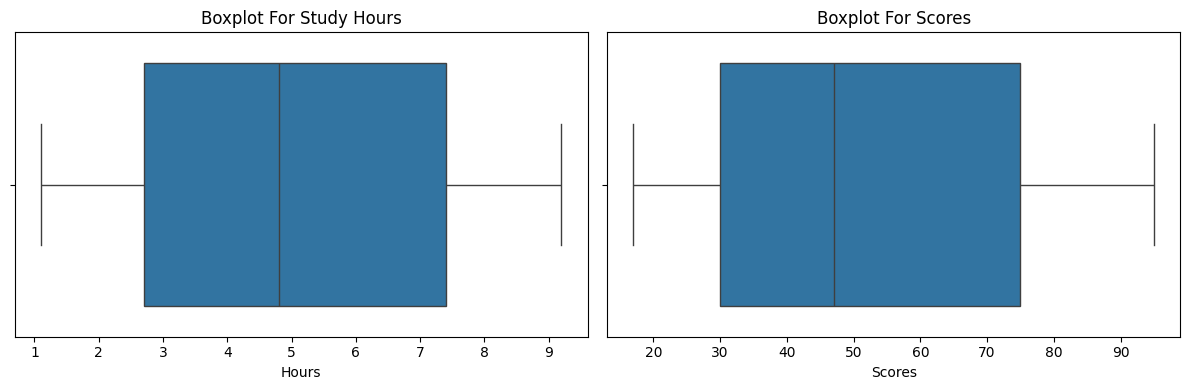

In [23]:
# Outlier analysis with boxplot
plt.figure(figsize=(12, 4))

# Boxplot for hours
plt.subplot(1,2,1)
sns.boxplot(x=df['Hours'])
plt.title('Boxplot For Study Hours')

# Boxplot for scores
plt.subplot(1,2,2)
sns.boxplot(x=df['Scores'])
plt.title('Boxplot For Scores')

plt.tight_layout()

**Conclusion: No outliers value were found in both variables**

## Splitting data

In [26]:
# Study hours spend
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [27]:
# Student scores
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [28]:
# Import machine learning data
from sklearn.model_selection import train_test_split

In [54]:
# Split the train data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
# train_size 0.75 -> 75% for training and 25% for test
# random_state = 42 -> for result split still same each time
# X_train for data Hours train
# X_test for data Hours test
# y_train for data Scores train
# y_test for data Scores test

In [55]:
# Reshape features into 2D Array
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1,1)

In [50]:
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [51]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

## Linear Regression

In [62]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

In [65]:
# Convert X_train and X_test to NumPy arrays
import numpy as np
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'